In [1]:
import numpy as np # linear algebra, data manipulation
import pandas as pd # data processing, # Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# change to  dates and time default formats
from datetime import datetime
import time


In [2]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\train_users_2.csv')


In [3]:
train_data.describe()

,Month_date_acc,timestamp_first_active,age,signup_flow
count,213451.000000,2.134510e+05,125461.000000,213451.000000
mean,6.022459,2.010000e+13,49.668335,3.267387
std,3.236690,0.000000e+00,155.666612,7.637707
min,1.000000,2.010000e+13,1.000000,0.000000
25%,3.000000,2.010000e+13,28.000000,0.000000
50%,6.000000,2.010000e+13,34.000000,0.000000
75%,9.000000,2.010000e+13,43.000000,0.000000
max,12.000000,2.010000e+13,2014.000000,25.000000


In [4]:
train_data.head()

,id,Month_date_acc,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6,6/28/2010,2.010000e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5,5/25/2011,2.010000e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9,9/28/2010,2.010000e+13,8/2/2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12,12/5/2011,2.010000e+13,9/8/2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9,9/14/2010,2.010000e+13,2/18/2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   Month_date_acc           213451 non-null  int64  
 2   date_account_created     213451 non-null  object 
 3   timestamp_first_active   213451 non-null  float64
 4   date_first_booking       88908 non-null   object 
 5   gender                   213451 non-null  object 
 6   age                      125461 non-null  float64
 7   signup_method            213451 non-null  object 
 8   signup_flow              213451 non-null  int64  
 9   language                 213451 non-null  object 
 10  affiliate_channel        213451 non-null  object 
 11  affiliate_provider       213451 non-null  object 
 12  first_affiliate_tracked  207386 non-null  object 
 13  signup_app               213451 non-null  object 
 14  firs

Data needs preprocessing as there are many null values

In [6]:
train_data.isnull().sum()

id                              0
Month_date_acc                  0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [7]:
#explore numerical columns, starting with age
train_data.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [8]:
train_data.loc[(train_data.age > 95) | (train_data.age < 15), 'age'] = np.nan
train_data['age']= train_data['age'].fillna(train_data['age'].median())


#I choose to fill with median because it's robust with outliers
train_data.age.isnull().sum()#checking for null values after filling

0

In [9]:
#We cannot delete rows that contain unknown and others because there is a large amount of data
train_data['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [10]:

train_data.dropna(inplace=True) #The dropna () method removes the rows that contains NULL values
train_data.isnull().sum()

id                         0
Month_date_acc             0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

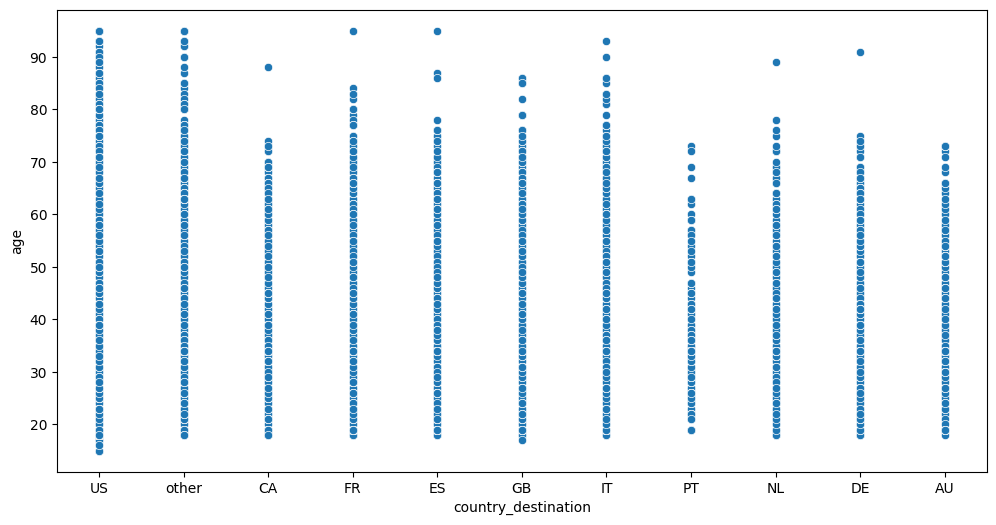

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87170 entries, 2 to 213445
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month_date_acc           87170 non-null  int64  
 1   date_account_created     87170 non-null  object 
 2   timestamp_first_active   87170 non-null  float64
 3   date_first_booking       87170 non-null  object 
 4   gender                   87170 non-null  object 
 5   age                      87170 non-null  float64
 6   signup_method            87170 non-null  object 
 7   signup_flow              87170 non-null  int64  
 8   language                 87170 non-null  object 
 9   affiliate_channel        87170 non-null  object 
 10  affiliate_provider       87170 non-null  object 
 11  first_affiliate_tracked  87170 non-null  object 
 12  signup_app               87170 non-null  object 
 13  first_device_type        87170 non-null  object 
 14  first_browser        

,Month_date_acc,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,9,2010-09-28,2.010000e+13,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,12,2011-12-05,2.010000e+13,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,9,2010-09-14,2.010000e+13,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,1,2010-01-01,2.010000e+13,2010-01-02,-unknown-,34.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,1,2010-01-02,2.010000e+13,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [11]:
train_data=train_data.drop_duplicates() #used to remove duplicate values
train_data =train_data.drop(['id'],axis=1) #removing id because it is not useful in our dataset , values are very large
plt.figure(figsize=(12,6))
sns.scatterplot(x='country_destination',y='age',data=train_data)
plt.show()
train_data.info()
# Converting to date time format
train_data['date_account_created'] = pd.to_datetime((train_data['date_account_created']))
train_data['date_first_booking'] = pd.to_datetime(train_data['date_first_booking'])
#train_data['timestamp_first_active'] = pd.to_datetime(train_data['timestamp_first_active'], format='%Y%m%d%H%M%S')
train_data.head()


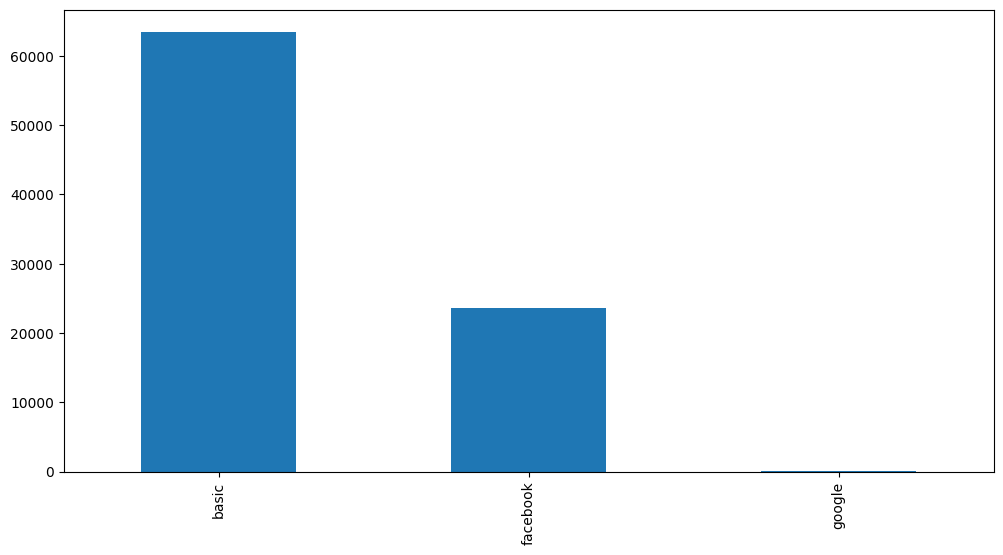

In [12]:
plt.figure(figsize=(12,6))
train_data.signup_method.value_counts(dropna=False).plot(kind='bar')
plt.show()

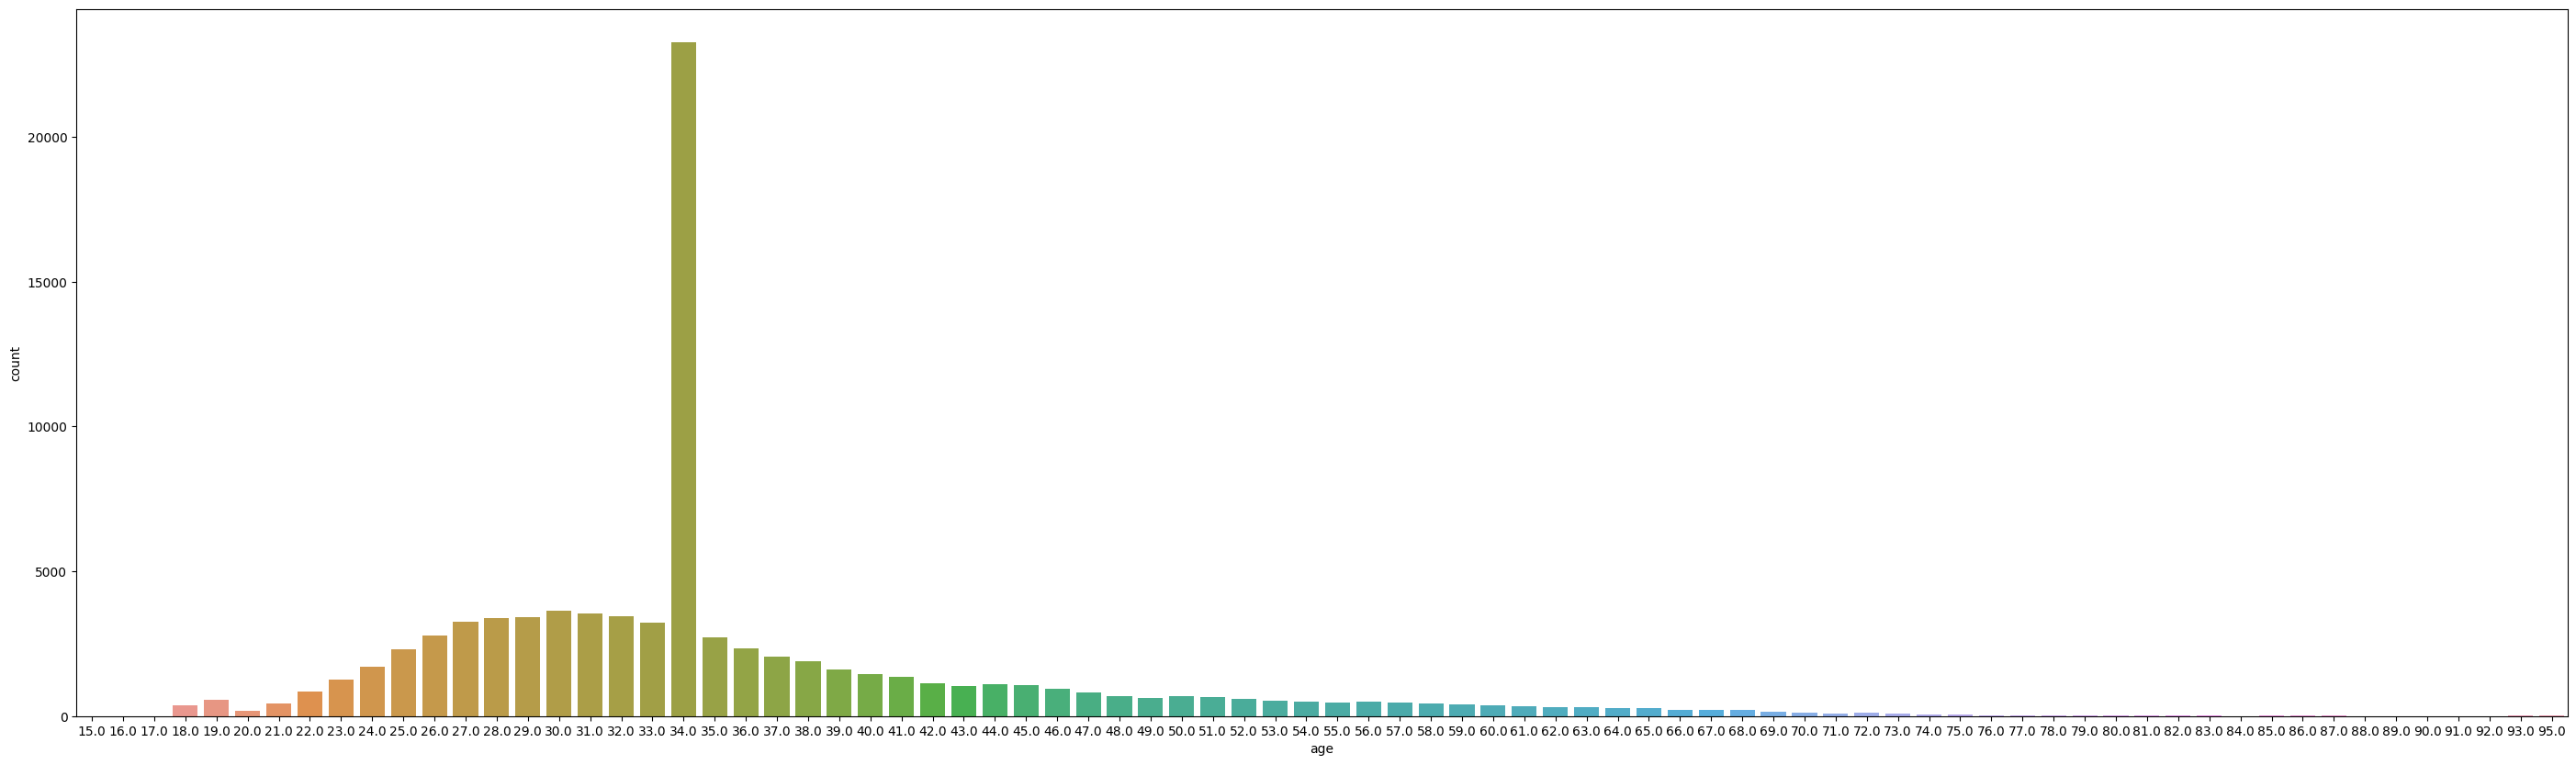

In [13]:
plt.figure(figsize=(35,10))
sns.countplot(x='age',data=train_data)#outliers are sucessfully removed
plt.show()

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

train_data.loc[train_data.gender=='MALE', 'gender'] = 0
train_data.loc[train_data.gender=='FEMALE', 'gender'] = 1
train_data.loc[train_data.gender=='-unknown-', 'gender'] = 2
train_data.loc[train_data.gender=='OTHER', 'gender'] = 3

#train_data['date_account_created'] = pd.to_datetime((train_data['date_account_created']))
#train_data[["day", "month", "year"]] = train_data["date_account_created"].str.split("-", expand = True)
#print(int(train_data["month"]))
#k=pd.Timestamp.timestamp
#print(k)
#train_data['date_account_created'] = train_data['date_account_created'].apply(k)

feature_cols=['gender','age','signup_flow']
#feature_cols=['gender','age',df['Month']]
x=train_data[feature_cols]
y=train_data.country_destination
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [15]:

#print(pd.DatetimeIndex(df['date_account_created']))
date_col=pd.DatetimeIndex(train_data['date_account_created'])
train_data['Year']=date_col.year
train_data['Month']=date_col.month
train_data['Day']=date_col.day
print (train_data)

        Month_date_acc date_account_created  timestamp_first_active  \
2                    9           2010-09-28            2.010000e+13   
3                   12           2011-12-05            2.010000e+13   
4                    9           2010-09-14            2.010000e+13   
5                    1           2010-01-01            2.010000e+13   
6                    1           2010-01-02            2.010000e+13   
...                ...                  ...                     ...   
213415               6           2014-06-30            2.010000e+13   
213439               6           2014-06-30            2.010000e+13   
213441               6           2014-06-30            2.010000e+13   
213443               6           2014-06-30            2.010000e+13   
213445               6           2014-06-30            2.010000e+13   

       date_first_booking gender   age signup_method  signup_flow language  \
2              2010-08-02      1  56.0         basic            3    

In [16]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
#tree.plot_tree(clf)
#plt.show()

In [17]:

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6936254827731253


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred_NB = clf.predict(X_test)
Acc=NB.score(X_test, y_pred)
print(Acc)


0.9899430232113494


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred_KNN= clf.predict(X_test)
Acc=neigh.score(X_test, y_pred)
print(Acc)

0.8730832472945586


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))